In [56]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import iplot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.tools.visualization import iplot_state_paulivec
from qiskit.visualization import plot_bloch_vector

In [25]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

# quantum circuit to make a Bell state 
bell = QuantumCircuit(q,c)
bell.h(q[0])
bell.cx(q[0],q[1])

meas = QuantumCircuit(q,c)
meas.measure(q, c)

# execute the quantum circuit 
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell+meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'11': 491, '00': 509}


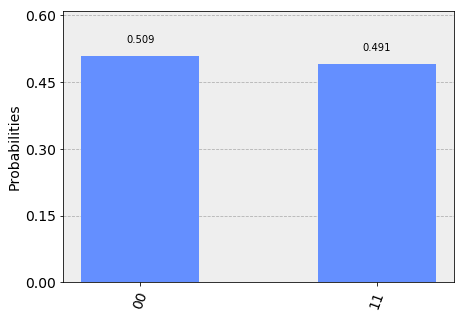

In [26]:
plot_histogram(counts)

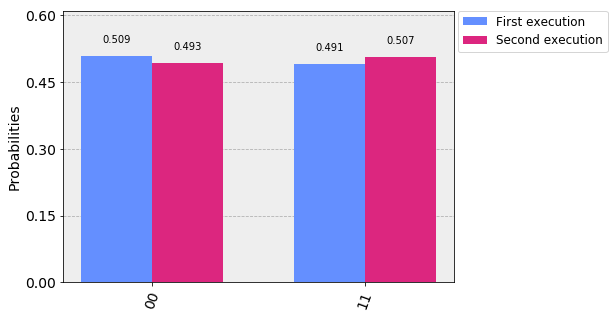

In [27]:
# Execute 2 qubit Bell state again
second_result = execute(circ, backend, shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

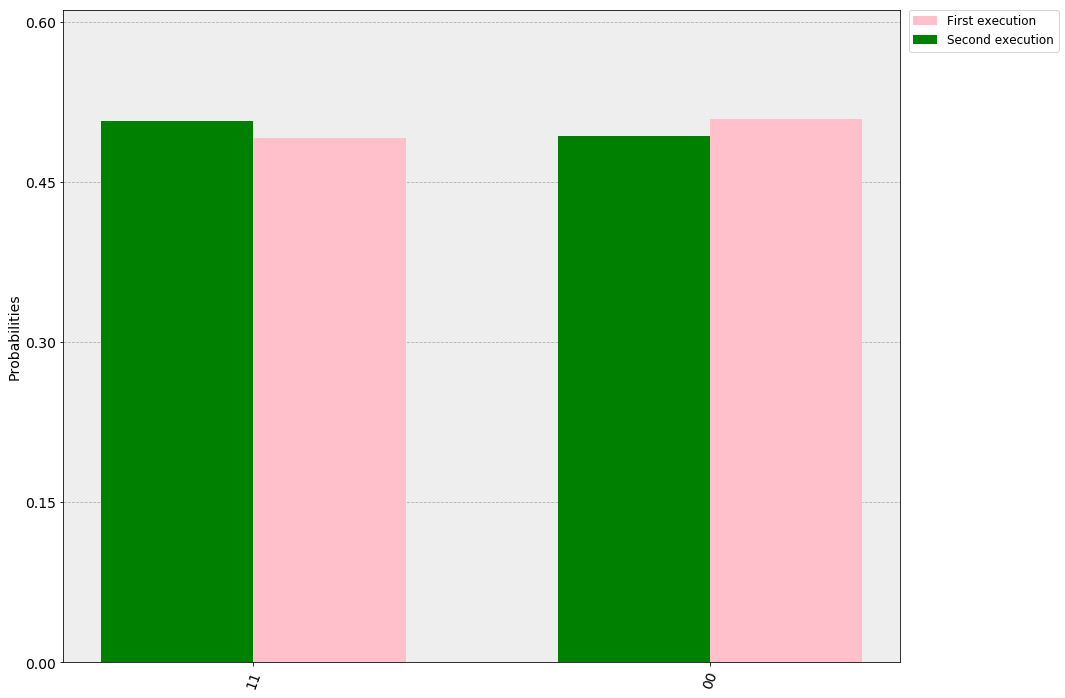

In [28]:
plot_histogram([counts, second_counts],
               legend=legend,
               sort='desc',
               figsize=(15,12), 
               color=['pink', 'green'],
               bar_labels=False)

In [29]:
iplot_histogram(counts)

In [31]:
# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)

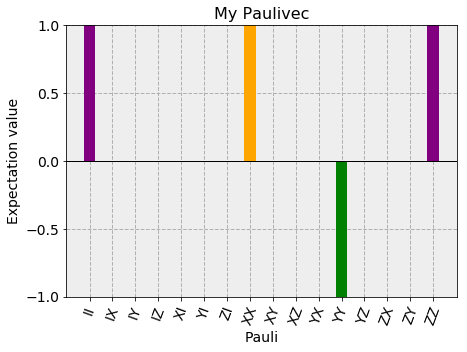

In [51]:
plot_state_paulivec(psi,
                    title="My Paulivec",
                    color=['purple', 'orange', 'green'])

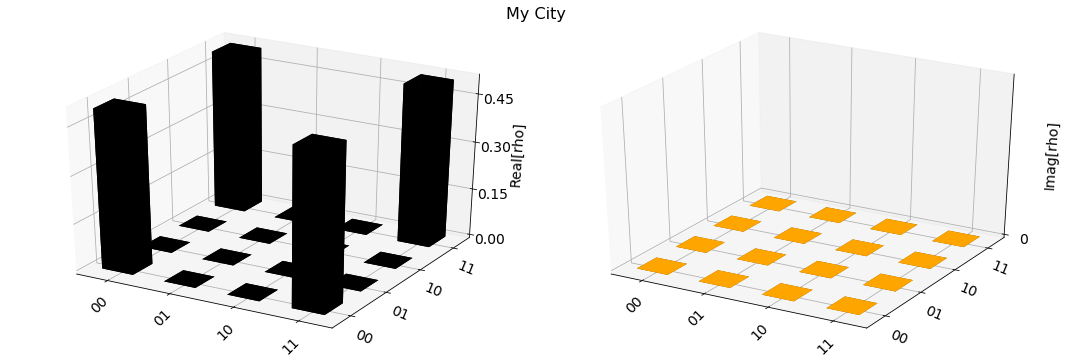

In [52]:
plot_state_city(psi, title="My City", color=['black', 'orange'])

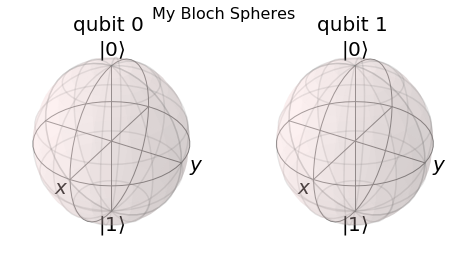

In [53]:
plot_bloch_multivector(psi, title="My Bloch Spheres")

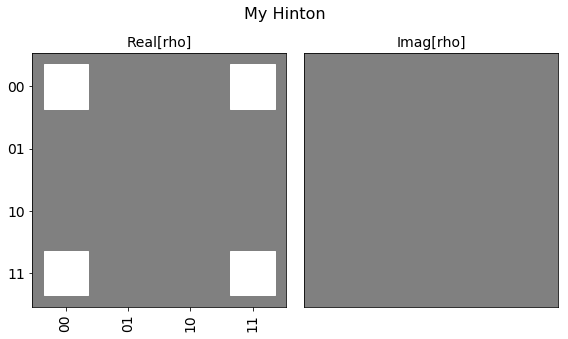

In [46]:
plot_state_hinton(psi, title="My Hinton")

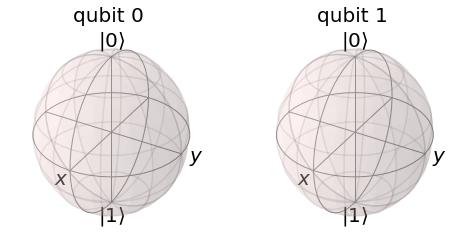

In [40]:
plot_bloch_multivector(psi)

In [55]:
iplot_state_paulivec(psi)

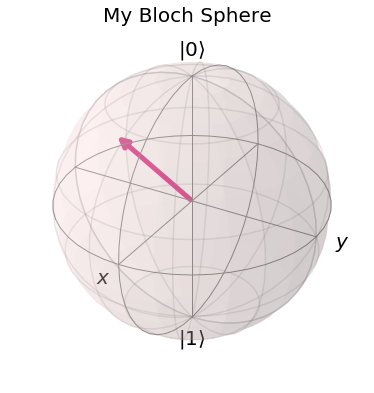

In [61]:
plot_bloch_vector([1,0,1], title='My Bloch Sphere')